In [13]:
import numpy as np
from xspline import xspline
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

#### Create a pattern from splines

In [14]:
knots = np.array([0.0, 0.5*np.pi, 1.5*np.pi, 2.0*np.pi])
degrees = 2
nbases = len(knots) + degrees - 1
sp = xspline(knots, degrees)

In [15]:
x = np.linspace(knots[0], knots[-1], 20)
X = sp.designMat(x)

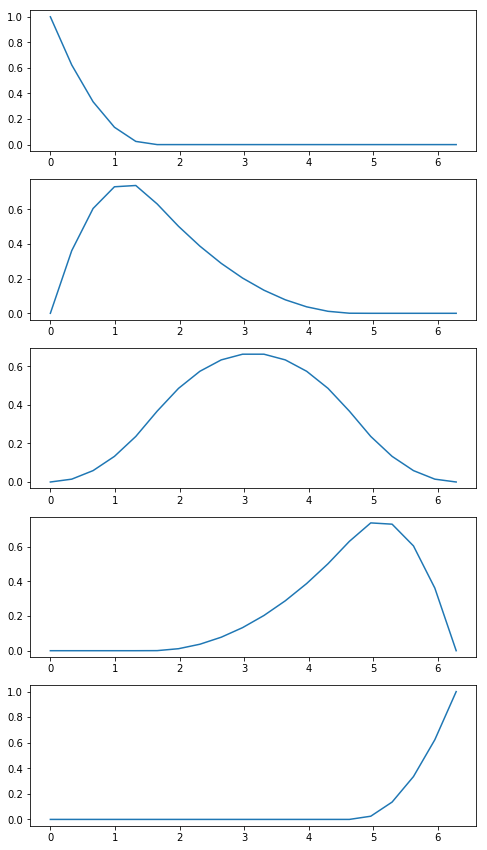

In [17]:
fig, axes = plt.subplots(nbases, 1, figsize=(8, nbases*3))
for i in range(nbases):
    axes[i].plot(x, X[:,i])

In [43]:
beta = np.array([.5, 0.2, 0., 0, .1])

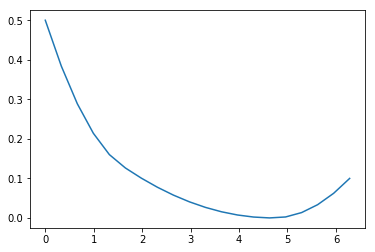

In [44]:
plt.plot(x, X.dot(beta))

#### Aggregate data gradually

- no shifts in pattern over time

In [67]:
T = 5
std = .05
m = 5
data = []
for t in range(T):
    starts = x[::t+1][:-1]
    ends = x[::t+1][1:]
    if ends[-1] != x[-1]:
        starts = np.append(starts, [ends[-1]])
        ends = np.append(ends, [x[-1]])
    assert len(starts) == len(ends)
    y = sp.designIMat(starts, ends, 1).dot(beta)
    data.extend([[int(t+1), int(t+1), starts[i], ends[i], y[i]/(t+1), std/(m*(t+1))] for i in range(len(y))])

In [68]:
data = np.array(data)
df = pd.DataFrame(data, columns=['year_start', 'year_end', 'age_start', 'age_end', 'mean', 'standard_error'])

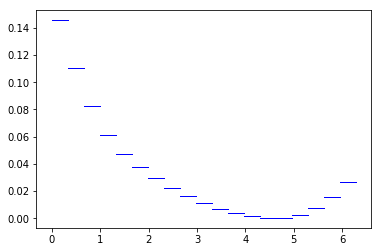

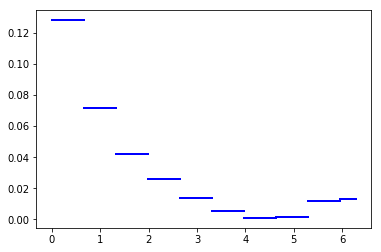

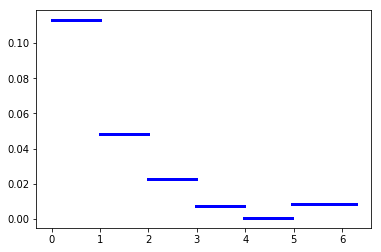

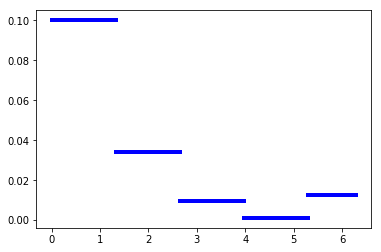

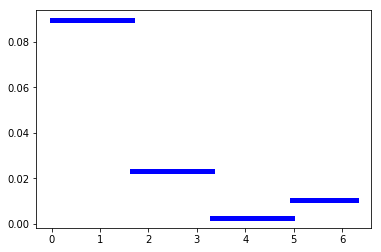

In [69]:
for t in range(T):
    plt.figure()
    vals = df[df['year_start'] == t+1]
    for i, row in vals.iterrows():
        plt.plot([row['age_start'], row['age_end']], [row['mean'], row['mean']], 'b', 
                 linewidth=.01/row['standard_error'])

In [70]:
df.head()

,year_start,year_end,age_start,age_end,mean,standard_error
0,1.0,1.0,0.000000,0.330694,0.145601,0.01
1,1.0,1.0,0.330694,0.661388,0.110669,0.01
2,1.0,1.0,0.661388,0.992082,0.082577,0.01
3,1.0,1.0,0.992082,1.322776,0.061324,0.01
4,1.0,1.0,1.322776,1.653470,0.046897,0.01


In [71]:
df.to_csv('spline_sim_data.csv')